# Designing Neural Network to classify iris dataset

In [1]:
import torch
import torch.nn as nn
from torch.optim import SGD
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
import pandas as pd
import numpy as np
from matplotlib import cm
from sklearn.model_selection import train_test_split
import matplotlib.patches as mpatches

In [2]:
iris = datasets.load_iris()
X = iris.data[:100,:2]
y = iris.target[:100]
flower = pd.DataFrame(X,columns=['length', 'width'])
flower['type']=y

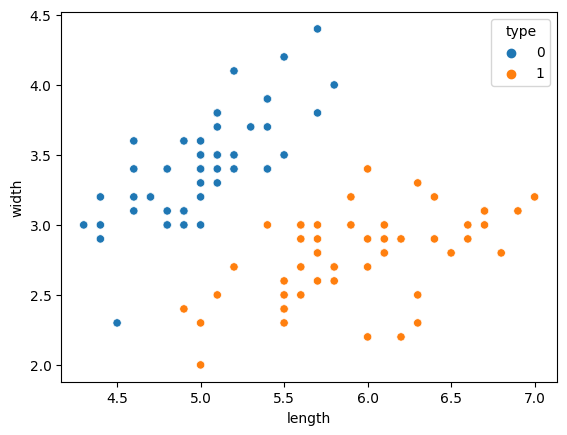

In [3]:
sns.scatterplot(data = flower, x='length', y = 'width', hue = 'type')
plt.show()

In [4]:
flower['setosa']= np.where(flower['type'] == 0, 1, 0)
flower['versicolor']= np.where(flower['type'] == 1, 1, 0)
del flower['type']

In [5]:
w00 = np.random.normal(0, 1)
w01 = np.random.normal(0, 1)
w02 = np.random.normal(0, 1)
w03 = np.random.normal(0, 1)
w10 = np.random.normal(0, 1)
w20 = np.random.normal(0, 1)
w30 = np.random.normal(0, 1)
w40 = np.random.normal(0, 1)
print("Weights for nn are:\n w00 = " + str(w00) + "\n w01 = "
      + str(w01) + "\n w02 = " + str(w02) + "\n w03 = " + str(w03) + "\n w10 = " + str(w10) + "\n w20 = "
      + str(w20) + "\n w30 = " + str(w30) + "\n w40 = " + str(w40))

Weights for nn are:
 w00 = 0.8799228656004537
 w01 = -0.45588081489988336
 w02 = -1.6948850907872175
 w03 = -0.0497284039952649
 w10 = 1.0356278958052172
 w20 = 0.20996496815806165
 w30 = -1.5548795076098776
 w40 = 1.0772631683514635


In [6]:
class BasicNN(nn.Module):
    def __init__(self):
        super().__init__()

        self.w00 = nn.Parameter(torch.tensor(w00), requires_grad=False)
        self.w01 = nn.Parameter(torch.tensor(w01), requires_grad=False)
        self.w02 = nn.Parameter(torch.tensor(w02), requires_grad=False)
        self.w03 = nn.Parameter(torch.tensor(w03), requires_grad=False)

        self.w10 = nn.Parameter(torch.tensor(w10), requires_grad=False)
        self.w20 = nn.Parameter(torch.tensor(w20), requires_grad=False)
        self.w30 = nn.Parameter(torch.tensor(w30), requires_grad=False)
        self.w40 = nn.Parameter(torch.tensor(w40), requires_grad=False)

        self.b00 = nn.Parameter(torch.tensor(0.0), requires_grad=False)
        self.b01 = nn.Parameter(torch.tensor(0.0), requires_grad=False)
        self.b10 = nn.Parameter(torch.tensor(0.0), requires_grad=False)
        self.b20 = nn.Parameter(torch.tensor(0.0), requires_grad=False)


    def forward(self, input1, input2):

        inputs_to_top_sigmoid = input1 * self.w00 + input2 * self.w10 + self.b00
        inputs_to_bottom_sigmoid = input1 * self.w01 + input2 * self.w20 + self.b10

        top_sigmoid_output = torch.sigmoid(inputs_to_top_sigmoid)
        bottom_sigmoid_output = torch.sigmoid(inputs_to_bottom_sigmoid)

        output1 = top_sigmoid_output * self.w02 + bottom_sigmoid_output * self.w30 + self.b01
        output2 = top_sigmoid_output * self.w03 + bottom_sigmoid_output * self.w40 + self.b20

        final_output = torch.softmax(torch.stack((output1, output2)), dim=0)
        
        return final_output


In [7]:
length = torch.rand(20)*7
width = torch.rand(20)*4.5

model = BasicNN()
final_output = model(length, width)

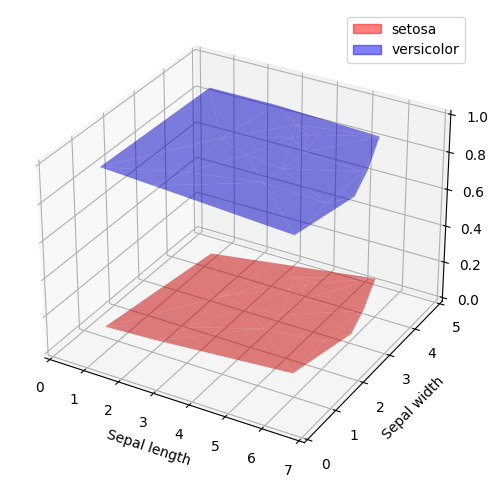

In [8]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('Sepal length')
ax.set_ylabel('Sepal width')
ax.set_xlim(0,7)
ax.set_ylim(0,5)
ax.set_zlim(0,1)

ax.plot_trisurf(length, width, final_output[0], color='red', alpha=0.5, label='Setosa') 
ax.plot_trisurf(length, width, final_output[1], color='blue', alpha=0.5, label='Versicolor') 
setosa = mpatches.Patch(color='red', alpha=0.5, label='setosa')
versicolor = mpatches.Patch(color='blue', alpha=0.5, label='versicolor')
ax.legend(handles=[setosa, versicolor])
plt.show()

In [9]:
class BasicNN_train(nn.Module):
    def __init__(self):
        super().__init__()

        self.w00 = nn.Parameter(torch.tensor(w00), requires_grad=True)
        self.w01 = nn.Parameter(torch.tensor(w01), requires_grad=True)
        self.w02 = nn.Parameter(torch.tensor(w02), requires_grad=True)
        self.w03 = nn.Parameter(torch.tensor(w03), requires_grad=True)

        self.w10 = nn.Parameter(torch.tensor(w10), requires_grad=True)
        self.w20 = nn.Parameter(torch.tensor(w20), requires_grad=True)
        self.w30 = nn.Parameter(torch.tensor(w30), requires_grad=True)
        self.w40 = nn.Parameter(torch.tensor(w40), requires_grad=True)

        self.b00 = nn.Parameter(torch.tensor(0.0), requires_grad=True)
        self.b01 = nn.Parameter(torch.tensor(0.0), requires_grad=True)
        self.b10 = nn.Parameter(torch.tensor(0.0), requires_grad=True)
        self.b20 = nn.Parameter(torch.tensor(0.0), requires_grad=True)


    def forward(self, input1, input2):

        inputs_to_top_sigmoid = input1 * self.w00 + input2 * self.w10 + self.b00
        inputs_to_bottom_sigmoid = input1 * self.w01 + input2 * self.w20 + self.b10

        top_sigmoid_output = torch.sigmoid(inputs_to_top_sigmoid)
        bottom_sigmoid_output = torch.sigmoid(inputs_to_bottom_sigmoid)

        output1 = top_sigmoid_output * self.w02 + bottom_sigmoid_output * self.w30 + self.b01
        output2 = top_sigmoid_output * self.w03 + bottom_sigmoid_output * self.w40 + self.b20

        final_output = torch.softmax(torch.stack((output1, output2)), dim=0)
        
        return final_output

In [10]:
train_df, test_df = train_test_split(flower, test_size=0.2, random_state=0)
train_df = train_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

In [11]:
input1 = torch.tensor(train_df.iloc[:,0].tolist())
input2 = torch.tensor(train_df.iloc[:,1].tolist())
label1 = torch.tensor(train_df.iloc[:,2].tolist())
label2 = torch.tensor(train_df.iloc[:,3].tolist())

In [12]:
model = BasicNN_train()

optimizer = SGD(model.parameters(), lr=0.02)

print("Final bias 1 before optimization: " + str(model.b01.data) + "\n")
print("Final bias 2 before optimization: " + str(model.b20.data) + "\n")

Final bias 1 before optimization: tensor(0.)

Final bias 2 before optimization: tensor(0.)



In [13]:
for epoch in range(10000):

    total_loss = 0
    for iteration in range(len(input1)):
        input1_i = input1[iteration]
        input2_i = input2[iteration]
        label1_i = label1[iteration]
        label2_i = label2[iteration]

        final_output = model(input1_i, input2_i)
        loss = (final_output[0] - label1_i) ** 2 + (final_output[1] - label2_i) ** 2

        loss.backward()

        total_loss += float(loss)

    if (total_loss < 0.0001):
        print("Num steps: " + str(epoch))
        break

    optimizer.step()
    optimizer.zero_grad()

    #print("Step: " + str(epoch) + " Final Bias 1: " + str(model.b01.data) + " Final Bias 2: " + str(model.b20.data) + " Total loss: " + str(total_loss) + "\n")
    
print("Total loss: " + str(total_loss))
print("Final bias 1 after optimization: " + str(model.b01.data) + "\n")
print("Final bias 2 after optimization: " + str(model.b20.data) + "\n")

Total loss: 0.05633840944005897
Final bias 1 after optimization: tensor(3.4926)

Final bias 2 after optimization: tensor(-3.4927)



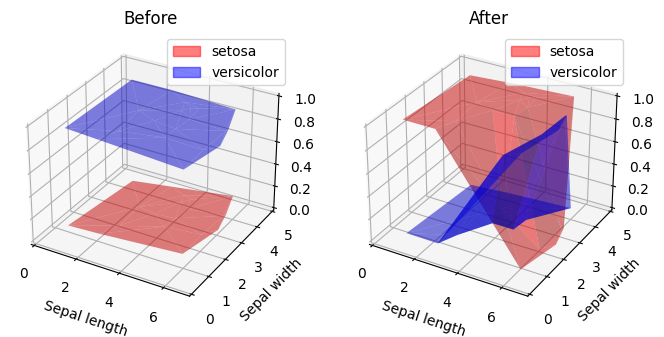

In [16]:
model1 = BasicNN()

final_output1 = model1(length, width)
final_output2 = model(length, width)

fig = plt.figure(figsize=(8, 6))

ax1 = fig.add_subplot(121, projection='3d')
ax1.set_title("Before")
ax1.set_xlabel('Sepal length')
ax1.set_ylabel('Sepal width')
ax1.set_xlim(0,7)
ax1.set_ylim(0,5)
ax1.set_zlim(0,1)

ax1.plot_trisurf(length, width, final_output1[0].detach().numpy(), color='red', alpha=0.5, label='Setosa') 
ax1.plot_trisurf(length, width, final_output1[1].detach().numpy(), color='blue', alpha=0.5, label='Versicolor') 
setosa = mpatches.Patch(color='red', alpha=0.5, label='setosa')
versicolor = mpatches.Patch(color='blue', alpha=0.5, label='versicolor')
ax1.legend(handles=[setosa, versicolor])

ax2 = fig.add_subplot(122, projection='3d')
ax2.set_title("After")
ax2.set_xlabel('Sepal length')
ax2.set_ylabel('Sepal width')
ax2.set_xlim(0,7)
ax2.set_ylim(0,5)
ax2.set_zlim(0,1)

ax2.plot_trisurf(length, width, final_output2[0].detach().numpy(), color='red', alpha=0.5, label='Setosa') 
ax2.plot_trisurf(length, width, final_output2[1].detach().numpy(), color='blue', alpha=0.5, label='Versicolor') 
setosa = mpatches.Patch(color='red', alpha=0.5, label='setosa')
versicolor = mpatches.Patch(color='blue', alpha=0.5, label='versicolor')
ax2.legend(handles=[setosa, versicolor])
plt.show()

### Evaluating the model

In [17]:
input1 = torch.tensor(test_df.iloc[:,0].tolist())
input2 = torch.tensor(test_df.iloc[:,1].tolist())
label1 = torch.tensor(test_df.iloc[:,2].tolist())
label2 = torch.tensor(test_df.iloc[:,3].tolist())

In [18]:
final_output = model(input1, input2)